In [ ]:
# import kagglehub

# path = kagglehub.dataset_download("hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")
# print("path to dataset files:", path)

## Import Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load Dataset

In [8]:
!unzip /content/Dataset.zip -d /content/extracted/

Archive:  /content/Dataset.zip
   creating: /content/extracted/Broccoli/
  inflating: /content/extracted/Broccoli/0001.jpg  
  inflating: /content/extracted/Broccoli/0002.jpg  
  inflating: /content/extracted/Broccoli/0003.jpg  
  inflating: /content/extracted/Broccoli/0004.jpg  
  inflating: /content/extracted/Broccoli/0005.jpg  
  inflating: /content/extracted/Broccoli/0006.jpg  
  inflating: /content/extracted/Broccoli/0007.jpg  
  inflating: /content/extracted/Broccoli/0008.jpg  
  inflating: /content/extracted/Broccoli/0009.jpg  
  inflating: /content/extracted/Broccoli/0010.jpg  
  inflating: /content/extracted/Broccoli/0011.jpg  
  inflating: /content/extracted/Broccoli/0012.jpg  
  inflating: /content/extracted/Broccoli/0013.jpg  
  inflating: /content/extracted/Broccoli/0014.jpg  
  inflating: /content/extracted/Broccoli/0015.jpg  
  inflating: /content/extracted/Broccoli/0016.jpg  
  inflating: /content/extracted/Broccoli/0017.jpg  
  inflating: /content/extracted/Broccoli/00

## Preprocessing

In [9]:
img_rows, img_cols = 224, 224

data_path = "/content/extracted/"

x,y = [], []

counter = 0

classes = os.listdir(data_path)

for class_path in os.listdir(data_path):
  for img_path in os.listdir(f"{data_path}{class_path}"):
    path = f"{data_path}{class_path}/{img_path}"
    label = counter

    image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode='grayscale')
    image = tf.keras.preprocessing.image.img_to_array(image)
    x.append(image)
    y.append(label)
  counter += 1

x = np.array(x)
y = np.array(y)


In [10]:
x = x.astype('float32') / 255.0

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=420)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=420)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

print(x_train.shape)

(1600, 224, 224, 1)


## AI Model

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(6, (5,5), activation='relu'))
model.add(keras.layers.Conv2D(6, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 220, 220, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 106, 106, 6)    │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 102, 102, 6)    │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 51, 51, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 15606)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │     1,872,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875,292 (7.15 MB)

 Trainable params: 1,875,292 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=120, validation_data=(x_val, y_val), epochs=10)

score = model.evaluate(x_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step - accuracy: 0.3758 - loss: 1.2656 - val_accuracy: 0.6500 - val_loss: 0.8878
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7000 - loss: 0.7895 - val_accuracy: 0.6750 - val_loss: 0.7293
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7799 - loss: 0.6145 - val_accuracy: 0.7400 - val_loss: 0.7013
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8284 - loss: 0.4639 - val_accuracy: 0.7800 - val_loss: 0.5304
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8832 - loss: 0.3358 - val_accuracy: 0.7750 - val_loss: 0.5587
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8904 - loss: 0.3084 - val_accuracy: 0.8150 - val_loss: 0.4380
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9242 - loss: 0.2178 - val_accuracy: 0.8000 - val_loss: 0.5414
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9158 - loss: 0.2114 - val_accuracy: 0.8200 -

## Predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


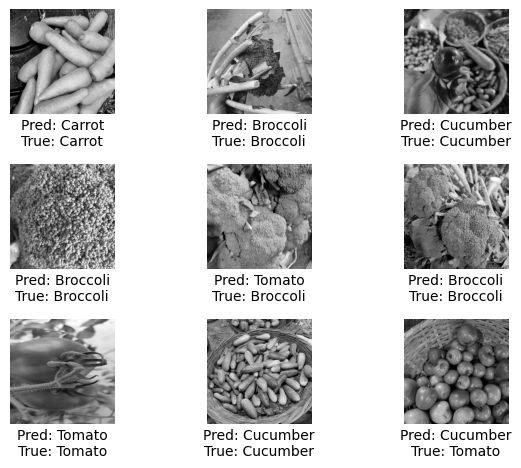

In [17]:
predictions = model.predict(x_test)
true_labels = np.argmax(y_test, axis=1)
predict_labels = np.argmax(predictions, axis=1)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis('off')
  plt.text(0.5, -0.15, f"Pred: {classes[predict_labels[i]]}", fontsize=10, ha='center', transform=plt.gca().transAxes)
  plt.text(0.5, -0.3, f"True: {classes[true_labels[i]]}", fontsize=10, ha='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## Plotting

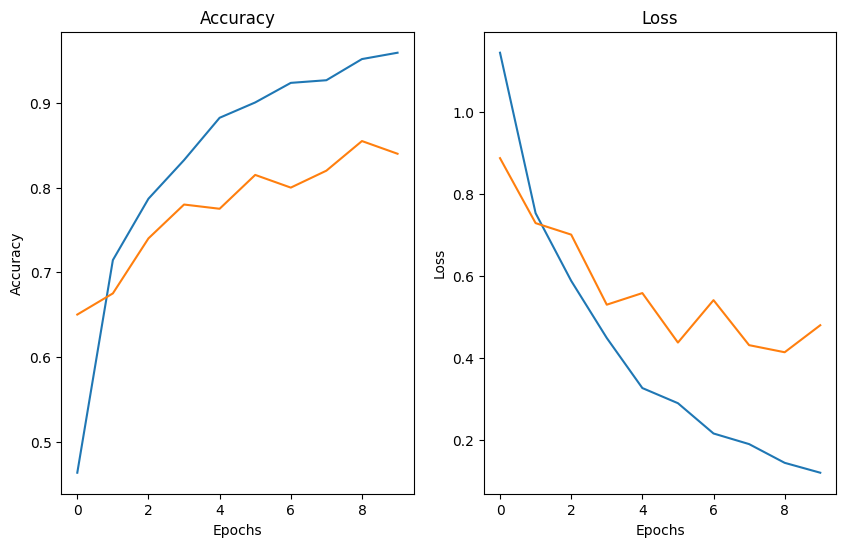

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend

plt.show()